# Proyecto final: Test A/B

# Índice
1. [Introducción](#in)
2. [Objetivos](#ob)
3. [Análisis exploratorio de datos (EDA)](#eda)
4. [ Valores nulos y duplicados](#nd)
5. [Tratando valores nulos](#tvn)
6. [Conviertiendo el tipo de datos](#ctd)
7. [Estudiar y comprobar los datoss](#eyc)
8. [Conversión en las etapas del embudo](#ce)
9. [Distribución en las muestras A y B](#ayb)
10. [Usuarios en las muestras](#uem) 
11. [Número de eventos en los días](#dn)
12. [Análizando peculiaridades](#ap)
13. [Recopilación datos de interés](#dti)
14. [Prueba Z](#pz)
15. [Conclusiones](#cl)
16. [Recomendaciones](#rcs)

#  Introducción  <a class="anchor" id="in"> </a>

Se nos ha asignado la tarea de continuar con un análisis iniciado por nuestros predecesores para una tienda en línea internacional. A pesar de que se lanzó una prueba A/B con el objetivo de optimizar algún aspecto del sitio web o la experiencia del usuario, la investigación fue abandonada sin completarse. En este contexto, solo se nos proporcionaron las especificaciones técnicas y los resultados preliminares de la prueba, los cuales servirán como base para realizar un análisis más profundo y llegar a conclusiones que permitan avanzar con el proyecto. Este reporte tiene como objetivo analizar los datos disponibles, interpretar los resultados obtenidos hasta el momento y proponer recomendaciones o nuevas pruebas que contribuyan a la mejora de la tienda en línea.

#  Objetivos <a class="anchor" id="ob"></a>

- Explora los datos:
    - Convertir los tipos de datos
    - Valores ausentes y duplicados 
- Análisis exploratorio de datos:
    - La conversión en las diferentes etapas del embudo.
    - Comprobar el número de eventos por usuario sea equitativo.
    - Comprobar si hay usuarios en ambas muestras.
    - Distribución del número de eventos entre los días.
    - identificar peculiaridades en los datos antes de la prueba A/B
- Evaluar los resultados de la prueba A/B:
    - Interpretar resultados de la prueba A/B
    - Uso de la prueba Z para comprobar la diferencia estadística entre las proporciones
- Conclusiones

#  Análisis exploratorio de datos (EDA) <a class="anchor" id="eda"></a>

Se importan las librerías necesarias para este proyecto

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import numpy as np
from scipy.stats import norm
import math
from statsmodels.stats.proportion import proportions_ztest 

Se cargan los datos los cuáles estarán contenidos en data frames. 

In [2]:
calendario=pd.read_csv(r"ab_project_marketing_events_us.csv",sep=",")
eventos=pd.read_csv(r"final_ab_events_upd_us.csv",sep=",")
usuarios=pd.read_csv(r"final_ab_new_users_upd_us.csv",sep=",")
participantes=pd.read_csv(r"final_ab_participants_upd_us.csv",sep=",")

Creación de funciones usadas a lo largo del proyecto, despliegan información general, valoes nulos y valores duplicados para los data frames.

In [3]:
def info(df,nombre):
    print(f"información para el data frame {nombre}")
    print(df.head())  #Primeras 5 filas del data frame
    print("\n")
    print(df.info(show_counts=True)) # Usando .info() en el data frame 
    print("\n")
    print(df.describe()) # Usando el .describe en el data frame
    print("\n")

def nulos(df,nombre):
    print(f"valores nulos del data frame {nombre}")
    print(df.isnull().sum())
    print("\n")

def duplicados(df,nombre):
    print(f"Valores dulicados en data frame {nombre}")
    print(df.duplicated().sum())

Usando las funciones para obtener información esencial de los data frames

In [4]:
info(calendario,"calendario")
info(eventos,"eventos")
info(usuarios,"usuarios")
info(participantes,"participantes")

información para el data frame calendario
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None


                            name 

#  Valores nulos y duplicados <a class="anchor" id="nd"></a>

Se usarán las funciones previas para obtener los valores nulos y duplicados.

## Valores nulos en los data frames

In [5]:
nulos(calendario,"calendario")
nulos(eventos,"eventos")
nulos(usuarios,"usuarios")
nulos(participantes,"participantes")

valores nulos del data frame calendario
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


valores nulos del data frame eventos
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


valores nulos del data frame usuarios
user_id       0
first_date    0
region        0
device        0
dtype: int64


valores nulos del data frame participantes
user_id    0
group      0
ab_test    0
dtype: int64




Observaciones:

-Se observa que el data frame calendario no tiene valores nulos

-Se observa que el data frame eventos tiene 363447 de 423761 en una columna

-Se observa que el data frame usuarios no tiene valores nulos

-Se observa que el data frame participantes no tiene valores nulos

## Valores duplicados en los data frames

In [6]:
duplicados(calendario,"calendario")
duplicados(eventos,"eventos")
duplicados(usuarios,"usuarios")
duplicados(participantes,"participantes")

Valores dulicados en data frame calendario
0
Valores dulicados en data frame eventos
0
Valores dulicados en data frame usuarios
0
Valores dulicados en data frame participantes
0


Observaciones:

-No se han encontrado valores duplicados en el data frame calendario

-No se han encontrado valores duplicados en el data frame eventos

-No se han encontrado valores duplicados en el data frame usuarios

-No se han encontrado valores duplicados en el data frame participantes

#  Tratando valores nulos  <a class="anchor" id="tvn"></a>

Dado que los detalles solo están en una pequeña porción de los datos respecto a la columnas que los contiene, puede eliminarse la columna o cambiar a "sin detalles" transformando el tipo de dato de la columna de float a object. 

In [7]:
eventos['details'] = eventos['details'].fillna("Sin detalles")
nulos(eventos,"eventos")

valores nulos del data frame eventos
user_id       0
event_dt      0
event_name    0
details       0
dtype: int64




#  Conviertiendo el tipo de datos  <a class="anchor" id="ctd"></a>

En este paso se convertirán los datos en los data frames que se consideren pertinentes para el análisis.

In [8]:
#Para data frame calendadio
calendario['start_dt'] = pd.to_datetime(calendario['start_dt'], errors='coerce')
calendario['finish_dt'] = pd.to_datetime(calendario['finish_dt'], errors='coerce')
#Para el data frame eventos
eventos['event_dt'] = pd.to_datetime(eventos['event_dt'], errors='coerce')
#Para el data frame usuarios
usuarios['first_date'] = pd.to_datetime(usuarios['first_date'], errors='coerce')

#  Estudiar y comprobar los datos  <a class="anchor" id="eyc"></a>

Primero se realizará una unión entre data frames se hace esto para poder tene usuarios asignados a ambos grupos de prueba tanto A como B, además de contar con información del evento que llevan a cabo al momento de realizar dicha prueba.

Se realiza un merge inner entre los dataframes eventos y participantes

In [9]:
eventos_con_grupos = eventos.merge(participantes, on='user_id', how='inner')

# Verificar si ahora tenemos todos los valores de group asignados
print(eventos_con_grupos.head()) 

            user_id            event_dt event_name details group  \
0  96F27A054B191457 2020-12-07 04:02:40   purchase    4.99     B   
1  831887FE7F2D6CBA 2020-12-07 06:50:29   purchase    4.99     A   
2  A92195E3CFB83DBD 2020-12-07 00:32:07   purchase    4.99     A   
3  354D653172FF2A2D 2020-12-07 15:45:11   purchase    4.99     A   
4  7FCD34F47C13A9AC 2020-12-07 22:06:13   purchase    9.99     B   

                   ab_test  
0        interface_eu_test  
1  recommender_system_test  
2        interface_eu_test  
3        interface_eu_test  
4        interface_eu_test  


Ahora tenemos los eventos y a que grupo de experimento pertenecen A o B.

Número de eventos que hay en los registros

In [10]:
print("Número de eventos registrados totales es:",eventos_con_grupos["event_name"].count())

Número de eventos registrados totales es: 102838


Número de eventos únicos

In [11]:
print("Número de eventos únicos es:",eventos_con_grupos["event_name"].nunique())

Número de eventos únicos es: 4


Número usuarios hay en los registros

In [12]:
print("Número de usuarios registrados totales es:",eventos_con_grupos["user_id"].count())

Número de usuarios registrados totales es: 102838


Número de usuarios únicos en los registros

In [13]:
print("Número de usuarios únicos es:",eventos_con_grupos["user_id"].nunique())

Número de usuarios únicos es: 13638


Promedio de eventos por usuario

In [14]:
print("Promedio de eventos por usuarios es:",eventos_con_grupos["event_name"].count()/eventos_con_grupos["user_id"].nunique())

Promedio de eventos por usuarios es: 7.540548467517231


Periodo de tiempo que cubren los datos 

In [15]:
print("Fecha mínima registrada:",eventos_con_grupos["event_dt"].min())
print("Fecha máxima registrada:",eventos_con_grupos["event_dt"].max())

Fecha mínima registrada: 2020-12-07 00:02:48
Fecha máxima registrada: 2020-12-30 18:28:55


#  Conversión en las etapas del embudo  <a class="anchor" id="ce"> </a>
Primero necesitamos encontrar el número de usuarios en cada uno de los eventos registrados además de su proporción respecto al número inicial de usuarios.

In [16]:
Eventos_u=eventos_con_grupos.groupby("event_name")["user_id"].nunique().reset_index()
Eventos_u.columns = ["evento", 'usuarios']
Eventos_u=Eventos_u.sort_values(by="usuarios", ascending=False)
Eventos_u["proporción"]=Eventos_u["usuarios"]/eventos_con_grupos["user_id"].nunique()
print(Eventos_u)

         evento  usuarios  proporción
0         login     13636    0.999853
2  product_page      8923    0.654275
3      purchase      4563    0.334580
1  product_cart      4394    0.322188


Si tomamos en consideración que el orden más lógico para el embudo es Login → Product Page → Product Cart → Purchase, podemos observar que el evento purchase no puede tener más usuarios que el evento product_cart dado que un usuario no puede pasar a comprar sin antes pasar al carrito, es decir, la sección donde se indica que se va a comprar.

Se realizará un ajuste con el fin de tener los casos donde para llegar al evento purchase se tienen que pasar antes por el evento product_cart, obteniendo así la proporción verdadera al pasar por el embudo formado anteriormente.

In [17]:
#Se revisa la proporción antes de ser ajustada
usuarios_purchase = eventos_con_grupos[eventos_con_grupos['event_name'] == 'purchase']['user_id'].nunique()
usuarios_cart=eventos_con_grupos[eventos_con_grupos['event_name'] == 'product_cart']['user_id'].nunique()
proporcion_correcta = usuarios_purchase / usuarios_cart
print(f"Proporción correcta Product Cart → Purchase: {proporcion_correcta:.4f}")

Proporción correcta Product Cart → Purchase: 1.0385


Aplicando corrección para tomar en cuenta que siempre antes de comprar se dirige al cliente a la página product_cart antes de realizar la compra

In [18]:
# Filtramos los usuarios que pasaron por 'product_cart'
usuarios_cart = eventos_con_grupos[eventos_con_grupos['event_name'] == 'product_cart']['user_id'].unique()
# Filtramos los usuarios que pasaron por 'purchase' y que también pasaron por 'product_cart'
usuarios_purchase = eventos_con_grupos[(eventos_con_grupos['event_name'] == 'purchase') & (eventos_con_grupos['user_id'].isin(usuarios_cart))]['user_id'].nunique()
# Calcular la proporción de 'Product Cart → Purchase' considerando solo los usuarios que pasaron por 'product_cart'
proporcion_corregida = usuarios_purchase / len(usuarios_cart)
print(f"Proporción corregida Product Cart → Purchase (solo usuarios que pasaron por 'product_cart'): {proporcion_corregida:.4f}")


Proporción corregida Product Cart → Purchase (solo usuarios que pasaron por 'product_cart'): 0.3320


Ahora que sabemos cual es la propoción correcta entre Product Cart → Purchase, procedemos a calcular las proporciones entre los eventos consecutivos.

In [19]:
# Definir el orden de los eventos en el embudo en orden
embudo = ["login", "product_page", "product_cart", "purchase"]

# Crear un diccionario para almacenar las proporciones entre las etapas del embudo
proporciones_embudo = {}

for i in range(1, len(embudo)):
    evento_anterior = embudo[i-1]
    evento_actual = embudo[i]
    
    # Obtener el número de usuarios en cada evento
    usuarios_anterior = Eventos_u[Eventos_u["evento"] == evento_anterior]["usuarios"].values[0]
    usuarios_actual = Eventos_u[Eventos_u["evento"] == evento_actual]["usuarios"].values[0]
    
    # Calcular la proporción de usuarios que pasan de un evento a otro
    if evento_anterior == "product_cart" and evento_actual == "purchase":
        # Para la transición product_cart → purchase, usar la proporción corregida
        usuarios_cart = eventos_con_grupos[eventos_con_grupos['event_name'] == 'product_cart']['user_id'].unique()
        usuarios_purchase = eventos_con_grupos[(eventos_con_grupos['event_name'] == 'purchase') & (eventos_con_grupos['user_id'].isin(usuarios_cart))]['user_id'].nunique()
        proporcion = usuarios_purchase / len(usuarios_cart)
    else:
        proporcion = usuarios_actual / usuarios_anterior
    
    # Guarda en diccionario
    proporciones_embudo[f"{evento_anterior} → {evento_actual}"] = proporcion

# Imprimir las proporciones entre los eventos consecutivos en el embudo
print("Proporciones entre eventos del embudo:")
for transicion, proporcion in proporciones_embudo.items():
    print(f"{transicion}: {proporcion:.4f}")

Proporciones entre eventos del embudo:
login → product_page: 0.6544
product_page → product_cart: 0.4924
product_cart → purchase: 0.3320


Porcentaje de usuarios que hacen todo el viaje desde su primer evento hasta el pago

In [20]:
usuarios_inicio = eventos_con_grupos[eventos_con_grupos["event_name"] == "login"]["user_id"].nunique()
usuarios_final = eventos_con_grupos[eventos_con_grupos["event_name"] == "purchase"]["user_id"].nunique()
p=(usuarios_final/usuarios_inicio)*100
print("Porcentaje de usuarios que están desde el inicio hasta el final:", p)

Porcentaje de usuarios que están desde el inicio hasta el final: 33.462892343795836


Usuarios hay en cada grupo totales y únicos

In [21]:
# Contar los eventos totales en cada grupo A/B
num_expt = eventos_con_grupos.groupby("group")["user_id"].count().reset_index()
num_expt.columns = ["grupo", "eventos"]
print(num_expt)
print("\n")

# Contar los usuarios únicos en cada grupo A/B
num_exp = eventos_con_grupos.groupby("group")["user_id"].nunique().reset_index()
num_exp.columns = ["grupo", "usuarios"]
print(num_exp)

  grupo  eventos
0     A    58705
1     B    44133


  grupo  usuarios
0     A      7874
1     B      6205


#  Distribución en las muestras A y B <a class="anchor" id="ayb"> </a>
Se buscará observar la distribución del número de eventos por usuario entre las muestras A y B

In [22]:
# Contar el número de eventos por usuario en cada grupo
eventos_por_usuario = eventos_con_grupos.groupby(["group", "user_id"])["event_name"].count().reset_index()
# Calcular el número promedio de eventos por usuario en cada grupo
promedio_eventos_por_usuario = eventos_por_usuario.groupby("group")["event_name"].mean().reset_index()
promedio_eventos_por_usuario.columns = ["grupo", "promedio_eventos_por_usuario"]
print(promedio_eventos_por_usuario)

  grupo  promedio_eventos_por_usuario
0     A                       7.45555
1     B                       7.11249


# Usuarios en las muestras <a class="anchor" id="uem"></a>
Comprobando si hay usuarios que están presentes en ambas muestras

In [23]:
# Filtrar los usuarios del grupo A
grupo_A = eventos_con_grupos[eventos_con_grupos['group'] == 'A'][['user_id']]
# Filtrar los usuarios del grupo B
grupo_B = eventos_con_grupos[eventos_con_grupos['group'] == 'B'][['user_id']]
# Realizar un merge entre ambos dataframes para encontrar los usuarios comunes
usuarios_comunes_df = pd.merge(grupo_A, grupo_B, on='user_id', how='inner')
print(f"Número de usuarios presentes en ambos grupos: {usuarios_comunes_df['user_id'].nunique()}")

Número de usuarios presentes en ambos grupos: 441


Para realizar la pueba de hipótesis A y B necesitamos que no existan usuarios que estén en  ambas muestras al mismo tiempo, por lo que se excluyen.

In [24]:
usuarios_comunes = usuarios_comunes_df['user_id'].unique()
# Filtrar el dataframe para excluir a esos usuarios
eventos_sin_usuarios_comunes = eventos_con_grupos[~eventos_con_grupos['user_id'].isin(usuarios_comunes)]
# Verificar los usuarios que ahora están en cada grupo
num_exp_sin_comunes = eventos_sin_usuarios_comunes.groupby("group")["user_id"].nunique().reset_index()
num_exp_sin_comunes.columns = ["grupo", "usuarios"]
print(num_exp_sin_comunes)

  grupo  usuarios
0     A      7433
1     B      5764


El número de usuarios obtenidos finalmente para cada muestra no tiene una diferencia tan grande, por lo que podemos seguir con el análisis. 

# Número de eventos en los días <a class="anchor" id="dn"></a>

Se obtendra la distibución del número de eventos en los días a través de una gráfica, con el fin de encontrar anomalías en los datos con los que se trabaja.

In [25]:
# Asegurandonos de que 'eventos_sin_usuarios_comunes' es una copia independiente
eventos_sin_usuarios_comunes = eventos_sin_usuarios_comunes.copy()
# Aseguramos que la columna 'fecha' está correctamente extraída
eventos_sin_usuarios_comunes.loc[:, 'fecha'] = eventos_sin_usuarios_comunes['event_dt'].dt.date
# Agrupando por fecha y contar los eventos por día
eventos_por_dia = eventos_sin_usuarios_comunes.groupby('fecha')['event_name'].count().reset_index()
# Cambiando el nombre de las columnas
eventos_por_dia.columns = ['fecha', 'numero_eventos']
print(eventos_por_dia)

         fecha  numero_eventos
0   2020-12-07            2573
1   2020-12-08            2768
2   2020-12-09            2921
3   2020-12-10            3018
4   2020-12-11            3007
5   2020-12-12            3948
6   2020-12-13            4370
7   2020-12-14            5800
8   2020-12-15            5373
9   2020-12-16            5102
10  2020-12-17            5283
11  2020-12-18            5437
12  2020-12-19            5788
13  2020-12-20            6334
14  2020-12-21            7985
15  2020-12-22            6562
16  2020-12-23            5826
17  2020-12-24            4488
18  2020-12-26            3180
19  2020-12-27            2939
20  2020-12-28            2557
21  2020-12-29            2181
22  2020-12-30              16


Graficando

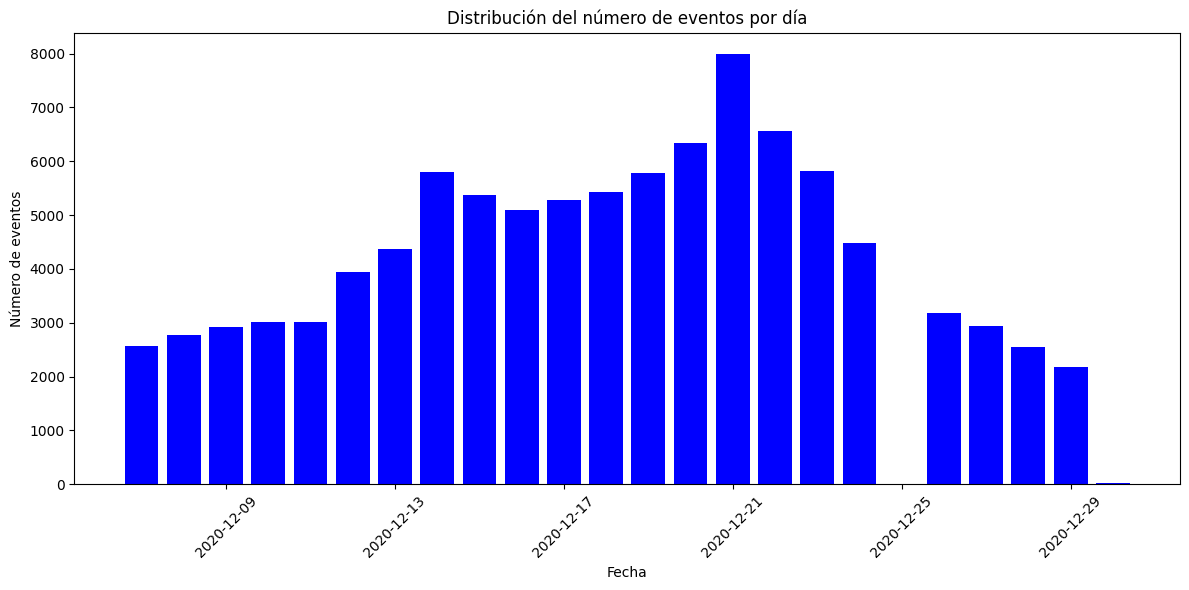

In [26]:

plt.figure(figsize=(12, 6))
plt.bar(eventos_por_dia['fecha'], eventos_por_dia['numero_eventos'], color='b')
plt.title('Distribución del número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análizando peculiaridades <a class="anchor" id="ap"></a>

Observaciones: 
El día 25 no aparece en el gráfico ni en la tabla de eventos. Esto puede ser debido a que no se registraron eventos en ese día o que bajo las condiciones y filtros que realizamos para tener registro entre usuarios y su relación con los grupos A y B no había ningun dato que lo cumpliera.

Los picos en los días previos a Navidad son probablemente consecuencia de una mayor actividad de los usuarios debido a la estacionalidad (las vísperas de Navidad suelen ser momentos clave de compras o interacciones). Esto es completamente normal y es algo que debes tener en cuenta en el análisis, ya que estos días podrían estar influenciando las métricas de manera significativa.

En cuanto al día 30, el hecho de que tenga solo 16 eventos puede deberse a que el análisis está limitado a un periodo corto o reciente, ya que las pruebas A/B suelen tener una ventana de tiempo específica. Esto indica que el análisis se interrumpe en el último día disponible de datos, lo que limita la muestra en ese día específico.

# Recopilación datos de interés <a class="anchor" id="dti"></a>

Interpretando y recompilando resultados de la prueba A/B:

El porcentaje de usuarios que están desde el inicio hasta el final: 33.462892343795836

Proporciones en el embudo:

login: 1.0  → product_page: 0.6544 → product_cart: 0.4924 → purchase: 0.3320

Usuarios únicos

Grupo A con 7433 eventos
Grupo B con 5764 eventos

## Interpretación

No parece haber una diferencia drástica entre los grupos A y B en cuanto a la conversión de eventos o el número de usuarios. Aunque el grupo A tiene un ligero mejor rendimiento en cuanto al número de eventos por usuario, esto no es una diferencia significativa.
Las tasas de conversión dentro del embudo (login → product_page → product_cart → purchase) son bastante saludables, pero podría haber oportunidades de mejora en la conversión de usuarios del carrito de compras a la compra final (33.20%).

# Prueba Z <a class="anchor" id="pz"></a> 

Comprobar las diferencias estadística entre las proporciones con la prueba Z. En este caso se usarán dos pruebas Z una a partir de la libreria proportions_ztest y la segunda a partir de formulas manuales y el uso de la tabla de distribución normal para encontrar un valor crítico para Z.

## Hipótesis de la prueba Z:
Hipótesis nula (H0): No hay diferencia significativa entre las proporciones de conversión de los dos grupos.

𝑝𝐴 = 𝑝𝐵 

Hipótesis alternativa (H1): Hay una diferencia significativa entre las proporciones de conversión de los dos grupos.

𝑝𝐴 ≠ 𝑝𝐵

## Prueba Z número 1

In [27]:
# Número de usuarios que completaron la conversión (compra)
usuarios_A = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'A']
usuarios_B = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'B']

usuarios_A_purchase = usuarios_A[usuarios_A['event_name'] == 'purchase']['user_id'].nunique()
usuarios_B_purchase = usuarios_B[usuarios_B['event_name'] == 'purchase']['user_id'].nunique()

# Número total de usuarios en cada grupo
usuarios_A_total = usuarios_A['user_id'].nunique()
usuarios_B_total = usuarios_B['user_id'].nunique()

# Definir el número de éxitos (conversiones) y el número total de observaciones (usuarios)
count = np.array([usuarios_A_purchase, usuarios_B_purchase])  # Éxitos (conversiones)
nobs = np.array([usuarios_A_total, usuarios_B_total])  # Observaciones (usuarios totales)

# Realizar el test de proporciones
z_statistic, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Mostrar resultados
print(f"Valor Z: {z_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

# Definir el nivel de significancia
alpha = 0.05

# Condición if-else para rechazar o no la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa entre los grupos A y B.")

Valor Z: 2.0989
P-valor: 0.0358
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos A y B.


## Prueba Z número 2

Para una prueba bilateral con 𝛼 = 0.05, se busca el valor de Z que corresponde a una probabilidad acumulada de  1 − 𝛼/2 = 0.975. Se busca en la tabla Z (tabla de distribución normal estándar) el valor correspondiente a una probabilidad acumulada de 0.975. Este valor es aproximadamente 1.96. Por  lo tanto, el Z crítico es ±1.96 o bien en este caso se utilizará norm.ppf(0.975) para determinarlo de manera más exacta.

In [28]:
#Calcular el número de usuarios que realizaron la conversión (compra) en el grupo A
usuarios_conversión_A = eventos_sin_usuarios_comunes[(eventos_sin_usuarios_comunes['group'] == 'A') & (eventos_sin_usuarios_comunes['event_name'] == 'purchase')]['user_id'].nunique()

# Calcular el número total de usuarios en el grupo A
total_usuarios_A = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'A']['user_id'].nunique()

# Calcular la proporción de conversión en el grupo A
p_A = usuarios_conversión_A / total_usuarios_A

# Calcular el número de usuarios que realizaron la conversión (compra) en el grupo B
usuarios_conversión_B = eventos_sin_usuarios_comunes[(eventos_sin_usuarios_comunes['group'] == 'B') & (eventos_sin_usuarios_comunes['event_name'] == 'purchase')]['user_id'].nunique()

# Calcular el número total de usuarios en el grupo B
total_usuarios_B = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'B']['user_id'].nunique()

# Calcular la proporción de conversión en el grupo B
p_B = usuarios_conversión_B / total_usuarios_B

# Definimos el número de éxitos en cada grupo (número de usuarios que completaron la acción de interés)
x_A = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'A']['user_id'].nunique()
x_B = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'B']['user_id'].nunique()

# Definimos los tamaños de las muestras
n_A = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'A']['user_id'].count()
n_B = eventos_sin_usuarios_comunes[eventos_sin_usuarios_comunes['group'] == 'B']['user_id'].count()

# Calculamos la proporción combinada
P = (x_A + x_B) / (n_A + n_B)

# Calculamos el valor Z
Z = (p_A - p_B) / np.sqrt(P * (1 - P) * ((1 / n_A) + (1 / n_B)))

# Mostramos el valor Z
print(f"Valor Z: {Z}")
z_critico = norm.ppf(0.975)
print(z_critico)

# Definir el nivel de significancia (alpha)
alpha = 0.05

# Definir el valor crítico Z para una prueba de dos colas con alpha=0.05
Z_critico = z_critico
#Poner tabla de distribución normal

# Verificar si el valor Z es mayor que el valor crítico
if abs(Z) > Z_critico:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos A y B")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos A y B")

Valor Z: 7.848995882050986
1.959963984540054
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos A y B


# Conclusiones <a class="anchor" id="cl"></a>

El análisis muestra que el nuevo embudo de pago (Grupo B) tiene un impacto positivo en la conversión de los usuarios en comparación con el Grupo A (control). A pesar de que la diferencia en el rendimiento entre los dos grupos no es extremadamente grande, la diferencia es estadísticamente significativa según el valor Z y el p-valor.
Los valores de Z: 2.0989 y P: 0.0358 son valores que nos indican que la diferencia en la conversión entre los grupos no es debida al azar y tiene un fundamento estadístico sólido.

Observamos que las tasas de conversión entre las diferentes etapas del embudo (login → product_page → product_card → purchase) son razonablemente saludables, lo que indica que la mayor parte del embudo funciona correctamente. Sin embargo, se observa una caída notable entre la etapa de agregar al carrito (product_card) y la compra final (purchase), con solo 33.20% de usuarios completando la compra después de agregar productos al carrito, es como si se arrepintieran.

Por ello, aunque la conversión es buena en términos generales, la caída de 66.80% de usuarios que abandonan el proceso entre el carrito y la compra final es una oportunidad de mejora importante. Esto podría ser debido a varios factores como:

- Problemas en el proceso de pago.

- Desconfianza de los usuarios en el método de pago.

- Precios o costos adicionales que no se comunican adecuadamente.

- Interrupciones en la experiencia del usuario durante el proceso de compra.

# Recomendaciones <a class="anchor" id="rcs"></a>

- Optimizar el proceso de compra: se podría investigar más a fondo por qué los usuarios no completan la compra después de agregar al carrito. Esto podría incluir pruebas de optimización en el proceso de pago, o la introducción de incentivos (descuentos, envío gratis, etc.).

- Monitoreo y segmentación: se podría realizar un análisis más detallado por segmentos para ver si ciertos grupos de usuarios se benefician más del nuevo sistema de recomendaciones.

- Iterar sobre la prueba A/B: Si el nuevo sistema de recomendaciones muestra un impacto positivo en el comportamiento de los usuarios, sería ideal seguir realizando pruebas adicionales para afinar el sistema, probar nuevas variantes o realizar pequeños ajustes para maximizar su efectividad.